`Import the modules`

In [87]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

`Read the data from the csv file and make a pandas dataframe of that`

In [88]:
df = pd.read_csv('profiles.csv')

`Get some info about the dataframe`

In [89]:
#df.info()

In [90]:
print('Some descriptive statistic data of numerical variables')
df.describe()

Some descriptive statistic data of numerical variables


,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [91]:
print('You can see above that the height and the income columns include data unrealistic.')

You can see above that the height and the income columns include data unrealistic.


In [92]:
print('Unique values of income')
df.income.unique()

Unique values of income


array([     -1,   80000,   20000,   40000,   30000,   50000,   60000,
       1000000,  150000,  100000,  500000,   70000,  250000], dtype=int64)

In [93]:
df[df.income == -1].head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


In [94]:
print('The number of observations with income value -1 is: ', len(df[df.income == -1]))

The number of observations with income value -1 is:  48442


In [95]:
print('''We could drop the whole income column because -1 is not a usual categorical variable and definitely not
a continuous numerical variable. Thus we cannot use them or replace the values without avoiding bias.''')

We could drop the whole income column because -1 is not a usual categorical variable and definitely not
a continuous numerical variable. Thus we cannot use them or replace the values without avoiding bias.


In [96]:
df = df.drop('income', axis=1)

In [97]:
print('Unique values of height')
df.height.unique()

Unique values of height


array([75., 70., 68., 71., 66., 67., 65., 72., 62., 64., 69., 73., 74.,
       60., 63., 76., 61., 78., 79., 59., 80., 91., 83., 77., 58., 56.,
       95., 57., 87., 81., 36., 43., 52., 55., 53., 93.,  8., 54., 82.,
        3., 86., 42., 84., 94., 50.,  6., 47., 49., 48., 90., 88., nan,
       37.,  9., 51.,  1., 92., 26., 85., 89.,  4.])

In [98]:
print('''The smallest 18 year-old-man in the world is 29 inches, thus we can replace the values, or drop those rows.
https://www.mirror.co.uk/news/world-news/worlds-shortest-teenager-named-18-27050545''')

The smallest 18 year-old-man in the world is 29 inches, thus we can replace the values, or drop those rows.
https://www.mirror.co.uk/news/world-news/worlds-shortest-teenager-named-18-27050545


In [99]:
df = df[~((df.height <= 29) | (df.height.isna()))]

In [100]:
df.describe()

,age,height
count,59936.000000,59936.000000
mean,32.340313,68.302306
std,9.453114,3.940899
min,18.000000,36.000000
25%,26.000000,66.000000
50%,30.000000,68.000000
75%,37.000000,71.000000
max,110.000000,95.000000


In [101]:
df.height.unique()

array([75., 70., 68., 71., 66., 67., 65., 72., 62., 64., 69., 73., 74.,
       60., 63., 76., 61., 78., 79., 59., 80., 91., 83., 77., 58., 56.,
       95., 57., 87., 81., 36., 43., 52., 55., 53., 93., 54., 82., 86.,
       42., 84., 94., 50., 47., 49., 48., 90., 88., 37., 51., 92., 85.,
       89.])

`Make cms from inches`

In [102]:
df.height = df.height*2.54

`Take a look at the "nan" values of the whole dataframe`

In [103]:
df_isna = df.isna().sum().sort_values()
#df_isna

`Choose some and categorical and numerical variables and put them into a list`

In [104]:
cats_and_nums = ['age', 'sex', 'orientation', 'height', 'status', 'drinks', 'body_type', 'smokes']

In [105]:
for feature in cats_and_nums:
    if feature not in ['age', 'height']:
        print(f'The unique values of {feature} is: {df[feature].unique()}')

The unique values of sex is: ['m' 'f']
The unique values of orientation is: ['straight' 'bisexual' 'gay']
The unique values of status is: ['single' 'available' 'seeing someone' 'married' 'unknown']
The unique values of drinks is: ['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
The unique values of body_type is: ['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
The unique values of smokes is: ['sometimes' 'no' nan 'when drinking' 'yes' 'trying to quit']


`Making pie charts, countplots and histograms of the features from the list`

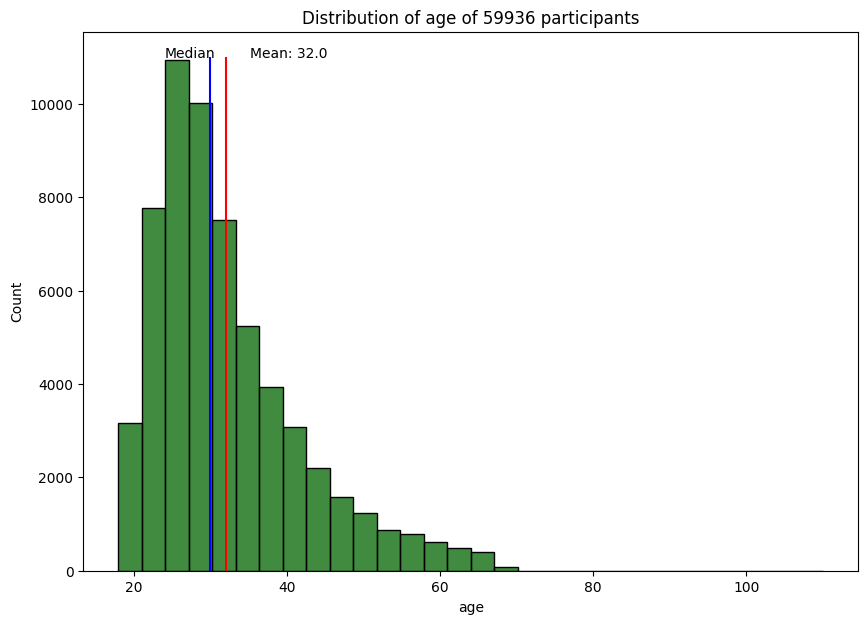

<Figure size 640x480 with 0 Axes>

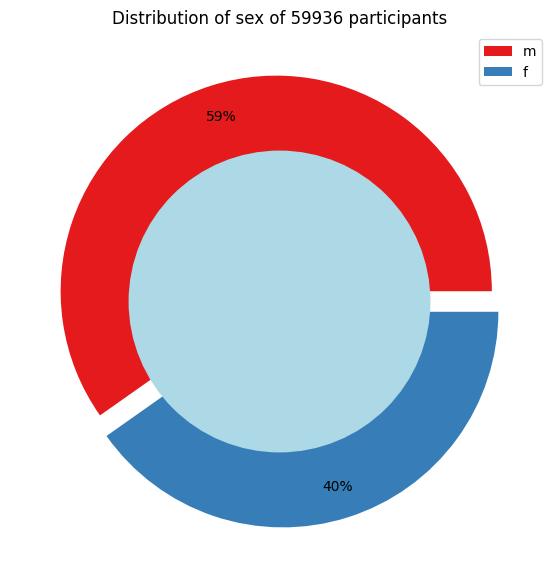

<Figure size 640x480 with 0 Axes>

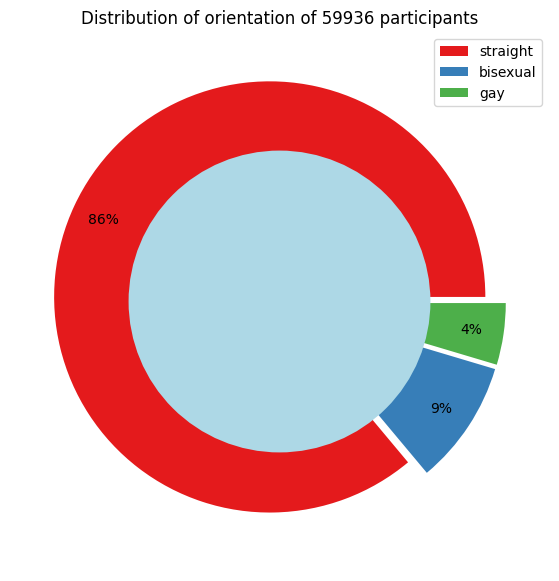

<Figure size 640x480 with 0 Axes>

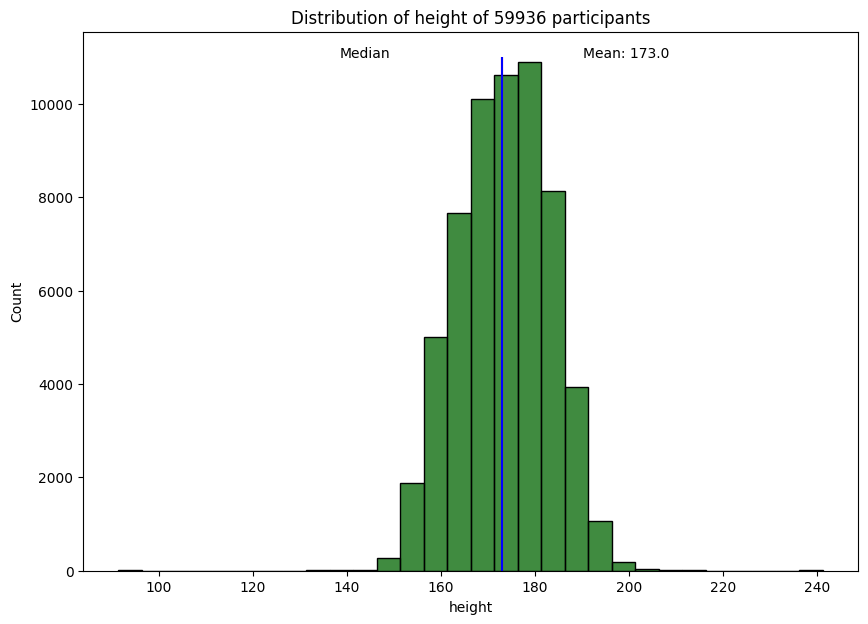

<Figure size 640x480 with 0 Axes>

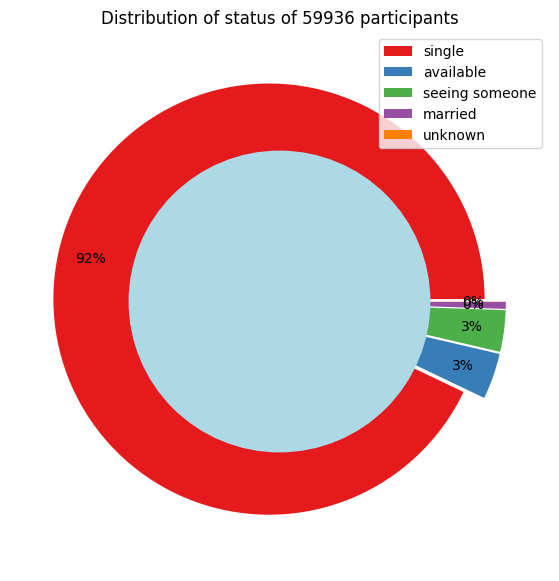

<Figure size 640x480 with 0 Axes>

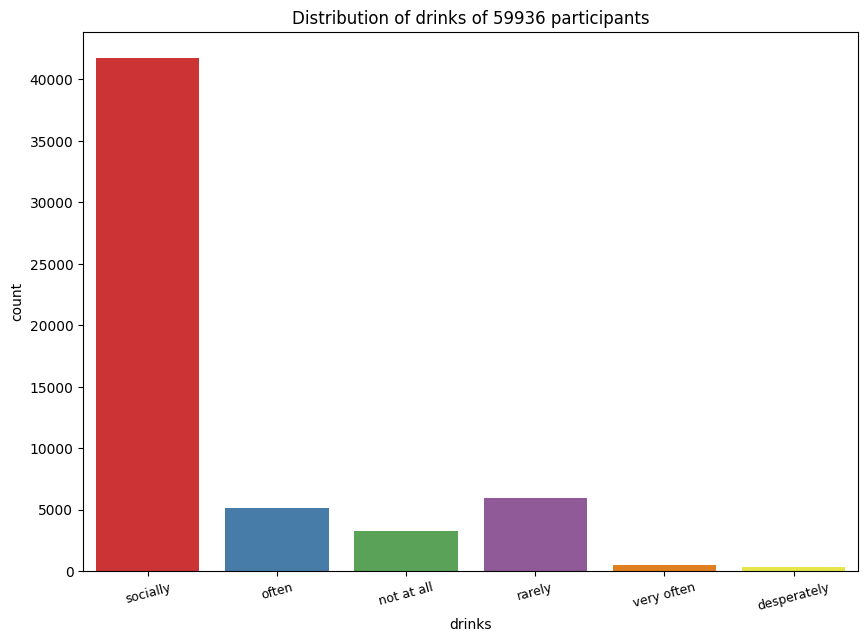

<Figure size 640x480 with 0 Axes>

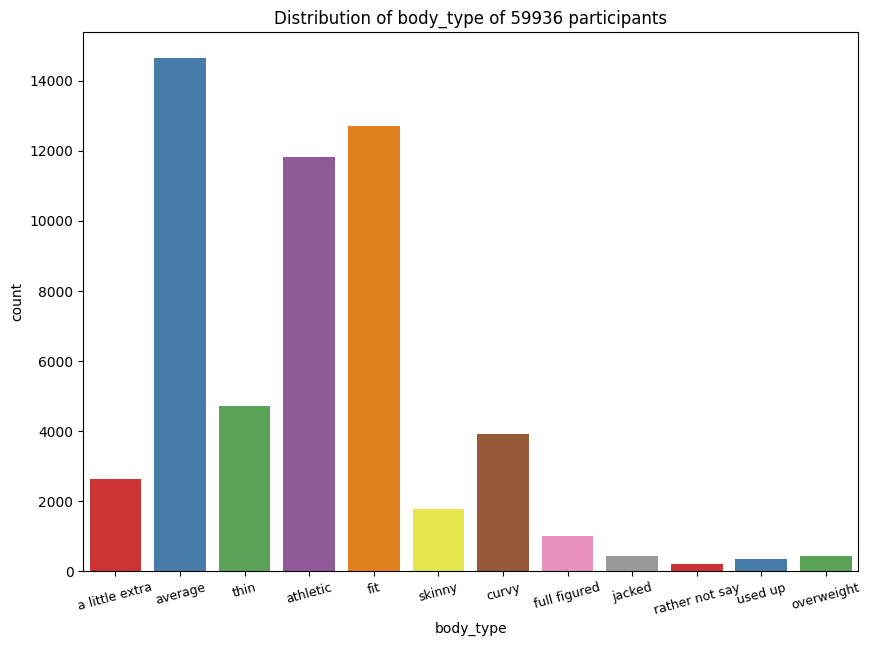

<Figure size 640x480 with 0 Axes>

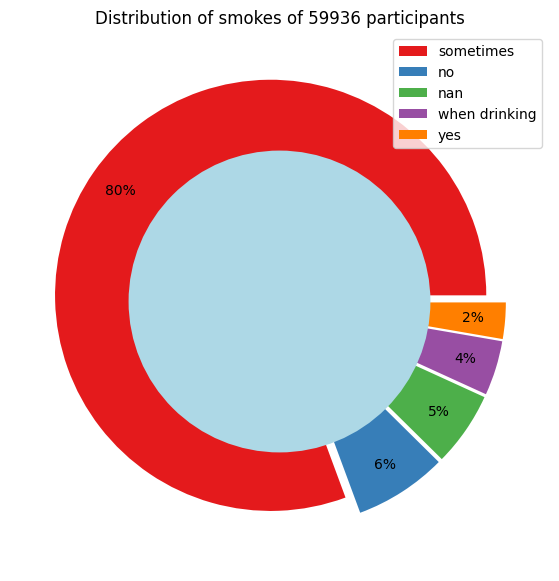

<Figure size 640x480 with 0 Axes>

In [106]:
for feature in cats_and_nums:
    plt.figure(figsize=[10, 7])
    data = df[feature]
    title = f'Distribution of {feature} of {len(data)} participants'
    if data.dtype == 'object':
        if data.nunique() < 6:
            plt.pie(data.value_counts(), autopct='%d%%', pctdistance=.85, explode=[0.05 for i in range(data.nunique())], colors=sns.color_palette('Set1'))
            plt.title(title)
            plt.legend(data.unique())
            plt.gcf().gca().add_artist(plt.Circle((0, 0), 0.7, facecolor='lightblue'))
        else:
            sns.countplot(x=data, saturation=0.75, palette='Set1')
            plt.title(title)
            plt.xticks(rotation=15, fontsize=9)
    elif data.dtype in ['int64', 'float64']:
        sns.histplot(data, bins=30, color='darkgreen')
        plt.title(title)
        mean, median = np.mean(data).round(), np.median(data).round()
        plt.vlines([mean, median], colors=['red', 'blue'], ymin=0, ymax=11000)
        plt.text(x=mean*1.1, y=11000, s=f'Mean: {mean}')
        plt.text(x=median*.8, y=11000, s='Median')
    plt.show()
    plt.clf()

In [107]:
df.smokes = df.smokes.fillna('unknown')

`Change the dtypes of "sex, orientation and status" categorical columns from object to int`

In [108]:
df.sex = np.where(df['sex'] == 'm', 1, 0)
df.orientation = df.orientation.replace(['straight', 'bisexual', 'gay'], [2, 1, 0])
df['status'] = df['status'].replace(['single', 'available', 'seeing someone'], 1)
df['status'] = df['status'].replace(['married', 'unknown'], 0)

In [109]:
encodeable = cats_and_nums[-3:]

In [110]:
encodeable

['drinks', 'body_type', 'smokes']

In [111]:
for uncoded_feature in encodeable:
    encoder = LabelEncoder()
    df[uncoded_feature] = encoder.fit_transform(df[uncoded_feature])
    

In [112]:
df_model = df[cats_and_nums]

In [113]:
df_model[df.income == -1]

AttributeError: 'DataFrame' object has no attribute 'income'

`Make the predictor and the outcome variables.`

`X is equal to a pandas dataframe with the chosen features and y is equal to a pandas series with status`

In [ ]:
X = df[cats_and_nums[:-4]]
y = df.status

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=15)

In [ ]:
model1 = LogisticRegression()

In [ ]:
model1.fit(X_train, y_train)

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred), model1.score(X_test, y_test)

In [ ]:
#df.sign.unique()

In [ ]:
sign_dict = {'gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'scorpio',
       'capricorn and it&rsquo;s fun to think about', 'leo',
       'aries but it doesn&rsquo;t matter', 'aries',
       'scorpio but it doesn&rsquo;t matter',
       'sagittarius and it&rsquo;s fun to think about',
       'libra and it matters a lot',
       'taurus and it&rsquo;s fun to think about',
       'leo and it matters a lot',
       'virgo and it&rsquo;s fun to think about',
       'cancer and it matters a lot', 'capricorn',
       'pisces and it matters a lot', 'aries and it matters a lot',
       'capricorn and it matters a lot', 'aquarius and it matters a lot',
       'sagittarius and it matters a lot', 'gemini and it matters a lot',
       'taurus and it matters a lot', 'virgo and it matters a lot'}

In [ ]:
df.location.unique()

In [ ]:
df.sex

In [ ]:
df.columns

In [ ]:
df_new = df.drop(['essay0','essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9',], axis=1)

In [ ]:
df_new.head(2)

In [ ]:
df_new.body_type.unique(), df_new.drugs.unique(), df_new.drinks.unique()

In [ ]:
features = list(df_new.columns)

In [ ]:
features

In [ ]:
df_new.ethnicity.unique()

In [ ]:
features.pop(6)

In [ ]:
np.max(df_new.last_online.unique())

In [ ]:
np.min(df_new.last_online.unique())

In [ ]:
fix_features = ['age', 'height', 'income', 'sex']

In [ ]:
varied_features = np.random.choice([feature for feature in features if feature != fix_features], 3)

In [ ]:
final_features = fix_features + list(varied_features)

In [ ]:
final_features

In [ ]:
pd.get_dummies(df_new[final_features], drop_first=True)

In [ ]:
df.status.unique()

In [ ]:
df.status.unique()

In [ ]:
y = df.status